# Time

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_sizes = [4000, 10000, 15000, 30000, 50000, 100000, 1000000]
PATH = '/home/longlab/Desktop/'

In [4]:
def read_time(dir_ = 'scvi', model = 'scvi'):
    time = []
    for j in data_sizes:

        with open(PATH + dir_ + f"/data_size_{j}/run_time_"+ model + ".txt", "r") as f:
            # Writing time to a file:
            x = f.read()
            time.append(float(x.split(': ')[1]))
    return time

In [5]:
scvi = read_time()
zinb = read_time('Oct13_ZINB_Grad_150', 'ZINB')
zinb_adap = read_time('Oct12_ZINB_Grad_Adaptive', 'ZINB')

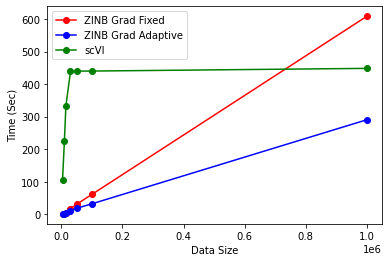

In [4]:


x = data_sizes



plt.plot(x, zinb, **{'color': 'red','marker': 'o'})
plt.plot(x, zinb_adap, **{'color': 'blue', 'marker': 'o'})
plt.plot(x, scvi, **{'color': 'green', 'marker': 'o'})
plt.legend(['ZINB Grad Fixed', 'ZINB Grad Adaptive', 'scVI'], loc='upper left')
plt.xlabel('Data Size')
plt.ylabel('Time (Sec)')
plt.show()

In [6]:
zinb_adap_min_15 = read_time('Oct19_ZINB_Grad_min_15', 'ZINB')
zinb_adap_min_20 = read_time('Oct24_ZINB_Grad_min_20', 'ZINB')
zinb_adap_min_25 = read_time('Oct24_ZINB_Grad_min_25', 'ZINB')

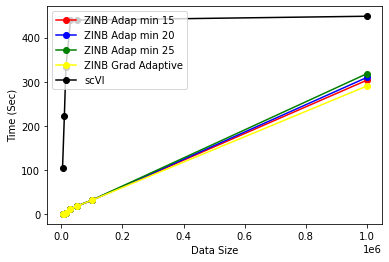

In [32]:
x = data_sizes



plt.plot(x, zinb_adap_min_15, **{'color': 'red','marker': 'o'})
plt.plot(x, zinb_adap_min_20, **{'color': 'blue','marker': 'o'})
plt.plot(x, zinb_adap_min_25, **{'color': 'green','marker': 'o'})
plt.plot(x, zinb_adap, **{'color': 'yellow', 'marker': 'o'})
plt.plot(x, scvi, **{'color': 'black', 'marker': 'o'})
plt.legend(['ZINB Adap min 15',
            'ZINB Adap min 20',
            'ZINB Adap min 25', 
            'ZINB Grad Adaptive', 
            'scVI'], loc='upper left')
plt.xlabel('Data Size')
plt.ylabel('Time (Sec)')
plt.show()

# Log-likelihood

In [7]:
def read_loglik(dir_ = 'scvi', model = 'scvi'):
    loglik_train = []
    loglik_test = []
    for j in data_sizes:

        with open(PATH + dir_ + f"/data_size_{j}/loglik_"+ model +".txt", "r") as f:
            # Writing time to a file:
            x = f.read()
            loglik_train.append(float(x.split(',')[0].split(':')[1])/j)
            j = np.min([j*0.2,10000])
            loglik_test.append(float(x.split(',')[1].split(':')[1])/j)
    
    return loglik_train, loglik_test 

In [8]:
loglik_scvi_train, loglik_scvi_test = read_loglik()
loglik_adap_ZINB_train, loglik_adap_ZINB_test = read_loglik('Oct12_ZINB_Grad_Adaptive', 'ZINB_Grad')
loglik_fixed_ZINB_train, loglik_fixed_ZINB_test = read_loglik('Oct13_ZINB_Grad_150', 'ZINB_Grad')
loglik_adap_ZINB_min_15_train, loglik_adap_ZINB_min_15_test = read_loglik('Oct19_ZINB_Grad_min_15', 'ZINB_Grad')
loglik_adap_ZINB_min_20_train, loglik_adap_ZINB_min_20_test = read_loglik('Oct24_ZINB_Grad_min_20', 'ZINB_Grad')
loglik_adap_ZINB_min_25_train, loglik_adap_ZINB_min_25_test = read_loglik('Oct24_ZINB_Grad_min_25', 'ZINB_Grad')

In [9]:
def read_loglik_zinb_org(dir_ = 'ZINB_org', model = 'ZINB_org'):
    loglik_train = []
    loglik_test = []
    data_sizes = [4000, 10000, 15000, 30000]
    for j in data_sizes:

        with open(PATH + dir_ + f"/data_size_{j}/loglik_"+ model +".txt", "r") as f:
            # Writing time to a file:
            x = f.read()
            loglik_train.append(float(x.split(',')[0].split(':')[1])/j)
            #loglik_test.append(float(x.split(',')[1].split(':')[1]))
    
    return loglik_train#, loglik_test 

In [10]:
loglik_ZINB_org_train = read_loglik_zinb_org()

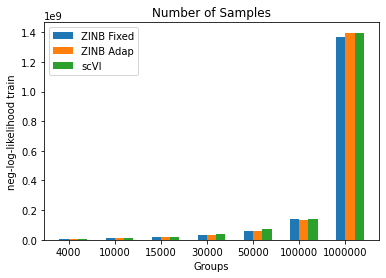

In [14]:
X = [str(i) for i in data_sizes]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1 , loglik_fixed_ZINB_train, 0.2, label = 'ZINB Fixed')
plt.bar(X_axis + 0.1, loglik_adap_ZINB_train, 0.2, label = 'ZINB Adap')
plt.bar(X_axis + 0.3, loglik_scvi_train, 0.2, label = 'scVI')

plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("neg-log-likelihood train")
plt.title("Number of Samples")
plt.legend()
plt.show()

In [25]:
print(loglik_fixed_ZINB_train)
print(loglik_adap_ZINB_train)
print(loglik_scvi_train)

[4740441.0, 11823458.0, 17789746.0, 34907856.0, 58208186.0, 141780802.0, 1367059792.0]
[4740441.0, 11823458.0, 17789746.0, 35412159.0, 58794683.0, 136051167.0, 1396715346.0]
[5590869.5, 13975495.0, 20968332.0, 41845688.0, 69772008.0, 139305184.0, 1395320960.0]


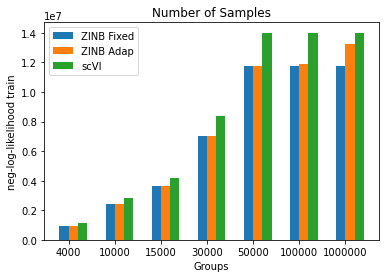

In [35]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = [str(i) for i in data_sizes]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1 , loglik_fixed_ZINB_test, 0.2, label = 'ZINB Fixed')
plt.bar(X_axis + 0.1, loglik_adap_ZINB_test, 0.2, label = 'ZINB Adap')
plt.bar(X_axis + 0.3, loglik_scvi_test, 0.2, label = 'scVI')

plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("neg-log-likelihood train")
plt.title("Number of Samples")
plt.legend()
plt.show()

In [27]:
print(loglik_fixed_ZINB_test)
print(loglik_adap_ZINB_test)
print(loglik_scvi_test)

[961355.9375, 2408797.5, 3640368.5, 7043600.0, 11741054.0, 11740057.0, 11741158.0]
[961355.9375, 2408797.5, 3640368.5, 7043288.5, 11750198.0, 11893048.0, 13214296.0]
[1124774.0, 2810115.25, 4209138.0, 8398944.0, 14007158.0, 13978104.0, 13990086.0]


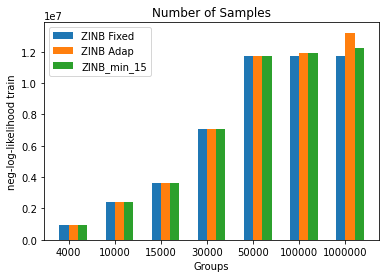

In [38]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = [str(i) for i in data_sizes]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1 , loglik_fixed_ZINB_test, 0.2, label = 'ZINB Fixed')
plt.bar(X_axis + 0.1, loglik_adap_ZINB_test, 0.2, label = 'ZINB Adap')
plt.bar(X_axis + 0.3, loglik_adap_ZINB_min_15_test, 0.2, label = 'ZINB_min_15')

plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("neg-log-likelihood train")
plt.title("Number of Samples")
plt.legend()
plt.show()

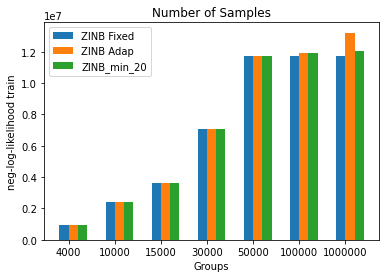

In [40]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = [str(i) for i in data_sizes]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1 , loglik_fixed_ZINB_test, 0.2, label = 'ZINB Fixed')
plt.bar(X_axis + 0.1, loglik_adap_ZINB_test, 0.2, label = 'ZINB Adap')
plt.bar(X_axis + 0.3, loglik_adap_ZINB_min_20_test, 0.2, label = 'ZINB_min_20')

plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("neg-log-likelihood train")
plt.title("Number of Samples")
plt.legend()
plt.show()

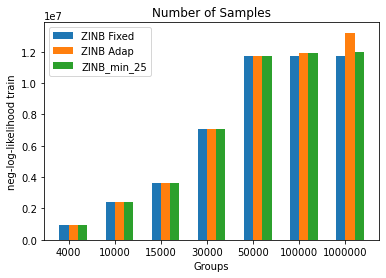

In [41]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = [str(i) for i in data_sizes]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1 , loglik_fixed_ZINB_test, 0.2, label = 'ZINB Fixed')
plt.bar(X_axis + 0.1, loglik_adap_ZINB_test, 0.2, label = 'ZINB Adap')
plt.bar(X_axis + 0.3, loglik_adap_ZINB_min_25_test, 0.2, label = 'ZINB_min_25')

plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("neg-log-likelihood train")
plt.title("Number of Samples")
plt.legend()
plt.show()

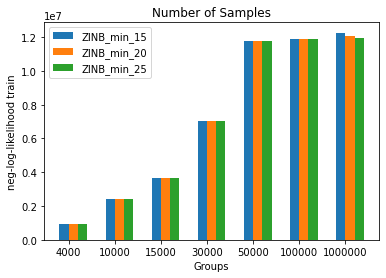

In [42]:
X = [str(i) for i in data_sizes]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1 , loglik_adap_ZINB_min_15_test, 0.2, label = 'ZINB_min_15')
plt.bar(X_axis + 0.1, loglik_adap_ZINB_min_20_test, 0.2, label = 'ZINB_min_20')
plt.bar(X_axis + 0.3, loglik_adap_ZINB_min_25_test, 0.2, label = 'ZINB_min_25')

plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("neg-log-likelihood train")
plt.title("Number of Samples")
plt.legend()
plt.show()

## Compare to ZINB Original

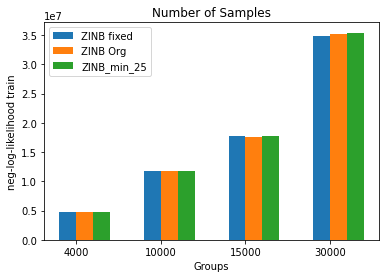

In [15]:
X = [str(i) for i in data_sizes[:4]]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1 , loglik_fixed_ZINB_train[:4], 0.2, label = 'ZINB fixed')
plt.bar(X_axis + 0.1, loglik_ZINB_org_train, 0.2, label = 'ZINB Org')
plt.bar(X_axis + 0.3, loglik_adap_ZINB_min_25_train[:4], 0.2, label = 'ZINB_min_25')

plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("neg-log-likelihood train")
plt.title("Number of Samples")
plt.legend()
plt.show()

In [12]:
loglik_ZINB_org_train = np.pad(loglik_ZINB_org_train, (0, 3), 'constant')

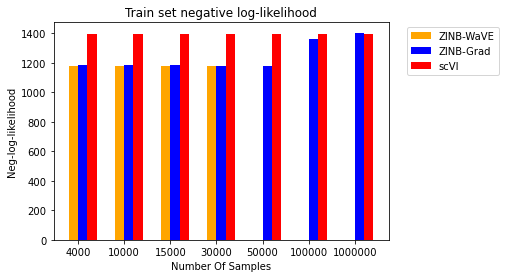

In [22]:
  
X = [str(i) for i in data_sizes]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1 , loglik_ZINB_org_train, 0.2, label = 'ZINB-WaVE', color = 'Orange')
plt.bar(X_axis + 0.1, loglik_adap_ZINB_min_25_train, 0.2, label = 'ZINB-Grad', color = 'Blue')
plt.bar(X_axis + 0.3, loglik_scvi_train, 0.2, label = 'scVI', color = 'red')

plt.xticks(X_axis, X)
plt.xlabel("Number Of Samples")
plt.ylabel("Neg-log-likelihood")
plt.title("Train set negative log-likelihood")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.savefig('/home/longlab/Desktop/train_neg_loglik.pdf', bbox_inches='tight')
plt.show()

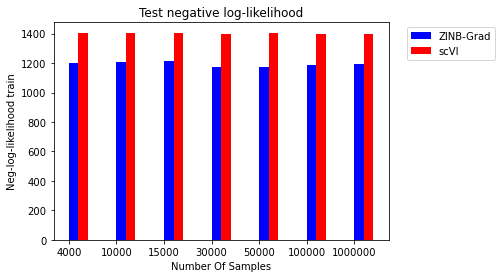

In [23]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = [str(i) for i in data_sizes]

  
X_axis = np.arange(len(X))
  

plt.bar(X_axis + 0.1, loglik_adap_ZINB_min_25_test, 0.2, label = 'ZINB-Grad', color = 'blue')
plt.bar(X_axis + 0.3, loglik_scvi_test, 0.2, label = 'scVI', color = 'red')

plt.xticks(X_axis, X)
plt.xlabel("Number Of Samples")
plt.ylabel("Neg-log-likelihood train")
plt.title("Test negative log-likelihood")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.savefig('/home/longlab/Desktop/test_neg_loglik.pdf', bbox_inches='tight')
plt.show()

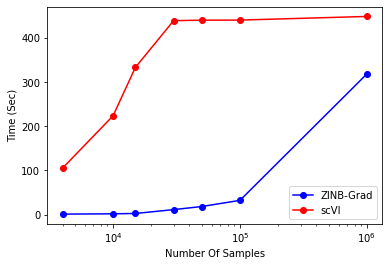

In [24]:
import matplotlib.pyplot as plt
import numpy as np

x = data_sizes



plt.plot(x, zinb_adap_min_25, **{'color': 'blue', 'marker': 'o'})
plt.plot(x, scvi, **{'color': 'red', 'marker': 'o'})
plt.legend(['ZINB-Grad', 
            'scVI'], loc='lower right')
plt.xlabel('Number Of Samples')
plt.ylabel('Time (Sec)')
plt.xscale('log')
plt.savefig('/home/longlab/Desktop/train_time.pdf', bbox_inches='tight')
plt.show()

In [11]:
%load_ext rpy2.ipython

In [ ]:
'''
CORTEX ZINB-Grad
The NMI score is: 0.7655360353111427
The ARI score is: 0.723612167041404
The ASW score is: 0.2924725115299225

ZINB-WaVE
The NMI score is: 0.7827477342502153
The ARI score is: 0.730702852519746
The ASW score is: 0.2880642738643205

scvi 
The NMI score is: 0.7524213712567251
The ARI score is: 0.7210002636449241
The ASW score is: 0.21499620378017426
'''

In [56]:
%%R


[1] 3 2


In [12]:
%%R
library(reshape2)
vectors = matrix(c(0.7655360353111427,0.723612167041404,0.2924725115299225,
         0.7827477342502153,0.730702852519746,0.2880642738643205,
         0.7524213712567251,0.7210002636449241,0.21499620378017426), ncol =3)
names <- c("NMI", "ARI", "ASW")
a = as.data.frame(cbind(names, vectors))
colnames(a) <- c('Metric', "ZINB-Grad", 'ZINB-WaVE', 'scVI')
a$Metric <- factor(a$Metric, levels = c("NMI", "ARI", "ASW"))
a <- melt(a, id = 'Metric')
a$value <- as.numeric(a$value)

In [28]:
%%R
library(ggplot2)
library(ggsci)

scaleFUN <- function(x) sprintf("%.2f", x)

p <- ggplot(data=a, aes(x=variable, y=value, fill=Metric)) +
geom_bar(stat="identity", position=position_dodge()) + 
scale_y_continuous(labels=scaleFUN, expand = c(0,0)) + 
xlab('Model') + ylab('Score')+
theme_classic() + scale_fill_igv()



In [29]:
%%R
ggsave('/home/longlab/Desktop/clustering.pdf',
       p,
  device = 'pdf', 
      width = 5.5, 
      height = 4.5, 
      units = 'in')

In [24]:
%%R
error = c(2.2420830726623535, 2.3304463952804095, 2.2216410636901855)
names <- c("ZINB-Grad", 'ZINB-WaVE', 'scVI')
df2 = as.data.frame(cbind(names, error))

df2$error <- as.numeric(df2$error)

In [25]:
%%R

p <- ggplot(data=df2, aes(x=names, y=error)) +
geom_bar(stat="identity", position=position_dodge(), fill = '#4da6ff', width = 0.5) +  
scale_y_continuous(expand = c(0,0), labels=scaleFUN) + 
xlab('Model') + ylab('Median Imputation Error') + 
theme_classic() 

In [27]:
%%R
ggsave('/home/longlab/Desktop/imputation.pdf',
       p,
  device = 'pdf', 
      width = 5.5, 
      height = 4.5, 
      units = 'in')